In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

from sklearn.decomposition import PCA

import joblib


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
input_path = "/shared/0/projects/prosocial/data/finalized/dataframes/train_metrics.tsv"
output_dir = Path("/shared/0/projects/prosocial/data/finalized/dataframes")
output_dir.mkdir(exist_ok=True, parents=True)
pca_output_path = output_dir / "pca.pth.tar"

In [8]:
metrics = [
        'Replies_informative_count', 'Replies_links_count', 'Replies_max_depth', 'Replies_sum_score',
        'Replies_total_number', 'Top_comment_article_accommodation', 'Top_comment_certain_accommodation',
        'Top_comment_conj_accommodation', 'Top_comment_discrep_accommodation', 'Top_comment_excl_accommodation',
        'Top_comment_incl_accommodation', 'Top_comment_ipron_accommodation', 'Top_comment_negate_accommodation',
        'Top_comment_quant_accommodation', 'Top_comment_tentat_accommodation', 'Replies_advice_count',
        'Replies_laughter_count', 'Replies_gratitude_count', 'Replies_informative_URL_count',
        'Replies_i_language_count', 'Replies_compliments_count', 'Replies_untuned_toxicity_children_count',
        'Top_comment_direct_children', 'Replies_distinct_pairs_of_sustained_conversation',
        'Replies_max_turns_of_sustained_conversations', 'Replies_untuned_non_toxic_percentage'
]  # 26 metrics

In [ ]:
df = pd.read_csv(input_path, usecols=["Top_comment_id"] + metrics, sep="\t")
M = df[metrics].values

In [ ]:
pca = PCA(n_components=len(metrics))
pca.fit(M)
print(f"Explained variance : {pca.explained_variance_ratio_}")

In [9]:
pca = joblib.load(pca_output_path)
print(f"Explained variance : {pca.explained_variance_ratio_}")

Explained variance : [5.74100787e-01 1.03204009e-01 6.73537138e-02 3.24143265e-02
 2.49210489e-02 2.25728255e-02 1.76224785e-02 1.60301243e-02
 1.58576840e-02 1.50153562e-02 1.33559596e-02 1.29463559e-02
 1.23997593e-02 1.09518965e-02 1.09304936e-02 9.69882871e-03
 8.63152512e-03 8.13845038e-03 7.79748989e-03 7.51704379e-03
 3.67832339e-03 1.90357726e-03 1.23905713e-03 6.87706949e-04
 6.52436572e-04 3.78741968e-04]


In [47]:
def single_plot_fig(labels, singluar_values, title, log=False, figsize=None, ylabel="converation outcomes"):
    if log:
        singluar_values = np.log(singluar_values)
    data_zipped = [tuple(x) for x in zip(labels, singluar_values)]
    df = pd.DataFrame(data_zipped,
                  columns=["PC", "% variance explained"])
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    if not figsize:
        figsize = (5, 8)
    f, ax = plt.subplots(figsize=figsize)
    
    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="% variance explained", y="PC", data=df, palette='viridis',
            label=title, ci=None)
    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel=ylabel, xlabel=title)
    sns.despine(left=True, bottom=True)

In [48]:
# calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

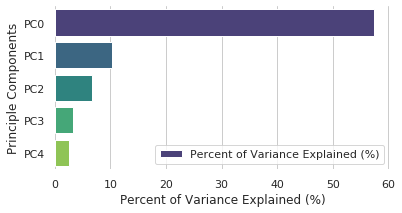

In [49]:
single_plot_fig([f'PC{i}' for i in range(5)], [x * 100 for x in pca.explained_variance_ratio_[:5]], 'Percent of Variance Explained (%)', False, (6, 3,), 'Principle Components')
plt.savefig('variance-explained.pdf', bbox_inches='tight')

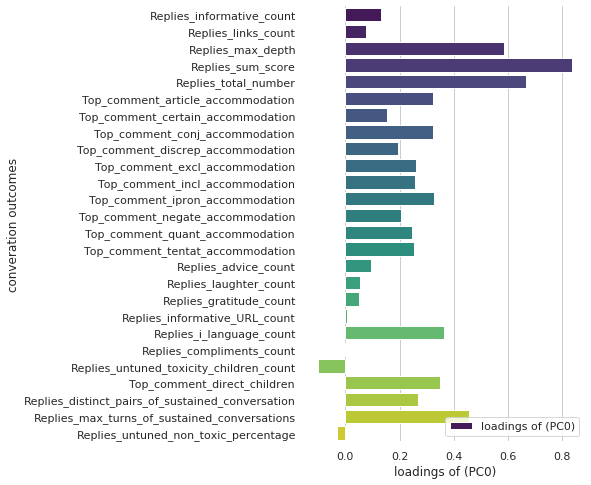

In [31]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 0]
single_plot_fig(label, loading, 'loadings of (PC0)', False)
plt.savefig('PC0-loadings.pdf', bbox_inches='tight')

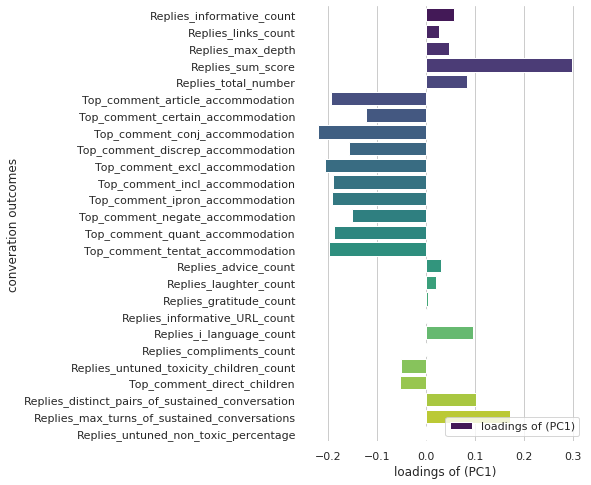

In [32]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 1]
single_plot_fig(label, loading, 'loadings of (PC1)', False)
plt.savefig('PC1-loadings.pdf', bbox_inches='tight')

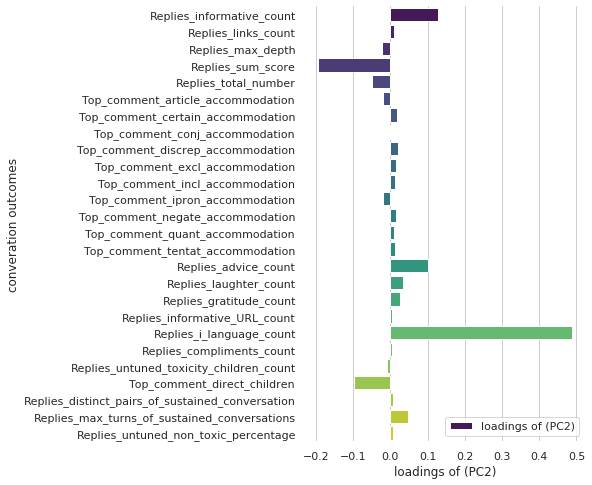

In [33]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 2]
single_plot_fig(label, loading, 'loadings of (PC2)', False)
plt.savefig('PC2-loadings.pdf', bbox_inches='tight')

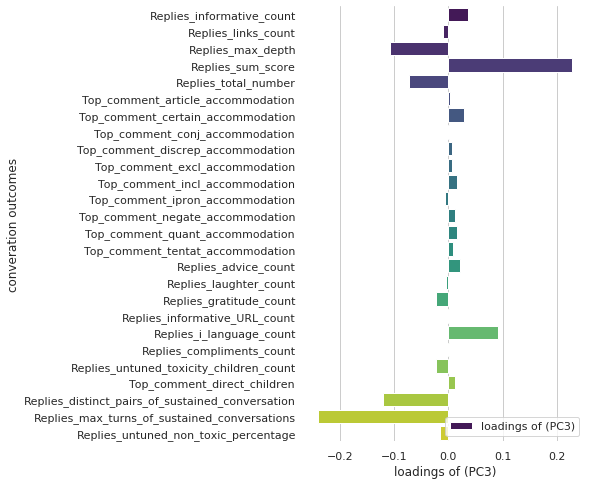

In [34]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 3]
single_plot_fig(label, loading, 'loadings of (PC3)', False)
plt.savefig('PC3-loadings.pdf', bbox_inches='tight')

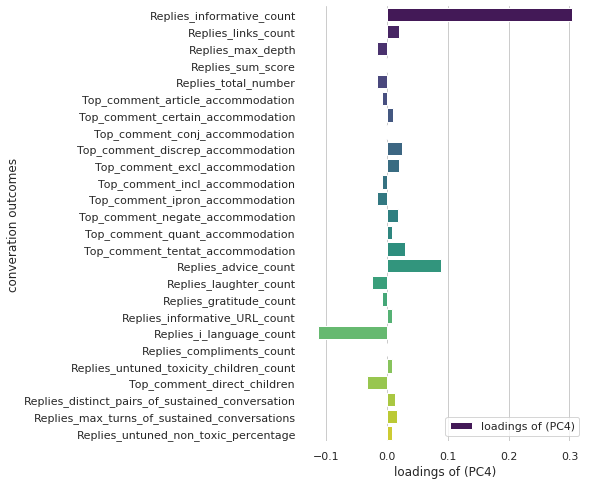

In [35]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 4]
single_plot_fig(label, loading, 'loadings of (PC4)', False)
plt.savefig('PC4-loadings.pdf', bbox_inches='tight')

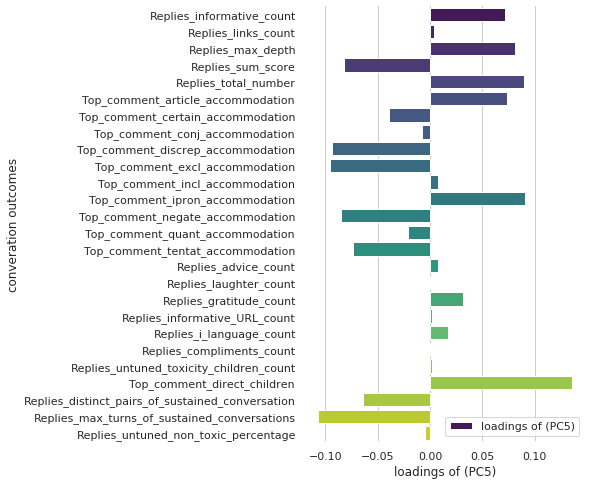

In [36]:
num = len(metrics)
label = metrics[:num]
loading = loadings[:, 5]
single_plot_fig(label, loading, 'loadings of (PC5)', False)
plt.savefig('PC5-loadings.pdf', bbox_inches='tight')

In [37]:
# joblib.dump(pca, pca_output_path)